In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import imageio.v3 as iio
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Only print the first 10 files in each folder
for dirname, _, filenames in os.walk('/kaggle/input'):
    i = 0
    for filename in filenames:
        print(os.path.join(dirname, filename))
        i += 1
        if i >= 10:
            break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/testA_52_anno.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_1_anno.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/testA_60.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_72.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_35.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/testA_12_anno.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_61_anno.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/testB_19.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/testA_5_anno.bmp
/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_12_anno.bmp


In [2]:
#  Load data
grade_path = "/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/Grade.csv"
grade = pd.read_csv(grade_path)
grade.head()

,name,patient ID,grade (GlaS),grade (Sirinukunwattana et al. 2015)
0,testA_1,4,benign,adenomatous
1,testA_10,10,benign,healthy
2,testA_11,9,benign,healthy
3,testA_12,11,malignant,poorly differentiated
4,testA_13,7,malignant,moderately differentiated


In [3]:
# Load data
nr_train = 85
nr_test = 80 
input_dir = "/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/"

In [4]:
def read_X_array(path):
    image = iio.imread(path)
    return np.array(image)/255

def read_Y_array(path):
    image = iio.imread(path)
    image = np.array(image)
    image = np.vectorize(lambda x: x!=0)(image)
    return image

train_X = np.empty((85, 522, 775, 3))
train_Y = np.empty((85, 522, 775))
test_X = np.empty((80, 522, 775, 3))
test_Y = np.empty((80, 522, 775))

train_id = 0
test_id = 0
for sample in grade.name:
    file_X = input_dir + sample + '.bmp'
    file_Y = input_dir + sample + '_anno.bmp'
    image_X = read_X_array(file_X)
    image_Y = read_Y_array(file_Y)
    if image_X.shape != (522, 775, 3):
        pass
    elif 'train' in sample:
        train_X[train_id] = image_X
        train_Y[train_id] = image_Y
        train_id += 1
    elif 'test' in sample:
        test_X[test_id] = image_X
        test_Y[test_id] = image_Y
        test_id += 1
        
train_X = train_X[range(train_id)]
train_Y = train_Y[range(train_id)]
test_X = test_X[range(test_id)]
test_Y = test_Y[range(test_id)]

In [5]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_11_anno.bmp'

[[ 1  1  1 ... 12 12 12]
 [ 1  1  1 ... 12 12 12]
 [ 1  1  1 ... 12 12 12]
 ...
 [ 5  5  5 ... 15 15 15]
 [ 5  5  5 ... 15 15 15]
 [ 5  5  5 ... 15 15 15]]


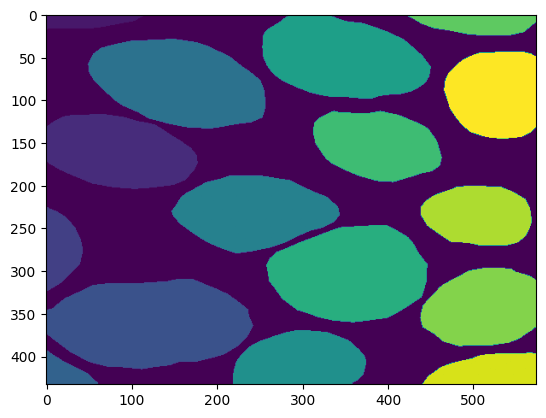

In [6]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_12_anno.bmp'
image = iio.imread(path)
print(image)
plt.imshow(image)
plt.show()

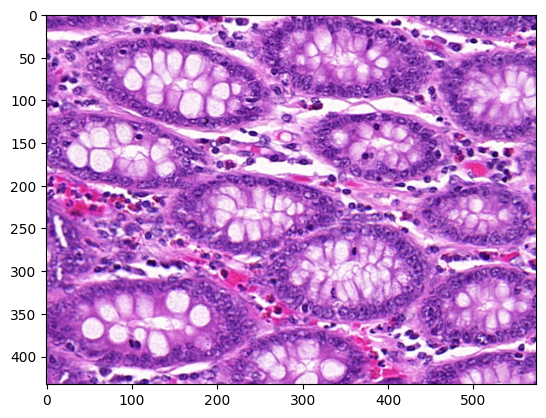

In [7]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_12.bmp'
image = iio.imread(path)
plt.imshow(image)
plt.show()

In [8]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/Grade.csv'
df = pd.read_csv(path)

In [9]:
df

,name,patient ID,grade (GlaS),grade (Sirinukunwattana et al. 2015)
0,testA_1,4,benign,adenomatous
1,testA_10,10,benign,healthy
2,testA_11,9,benign,healthy
3,testA_12,11,malignant,poorly differentiated
4,testA_13,7,malignant,moderately differentiated
...,...,...,...,...
160,train_82,2,malignant,moderately-to-poorly differentated
161,train_83,11,malignant,poorly differentiated
162,train_84,15,benign,healthy
163,train_85,10,benign,healthy


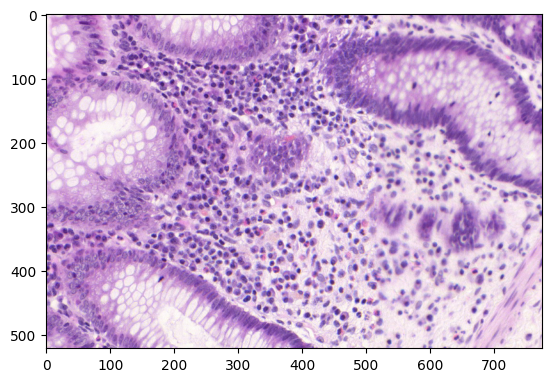

In [10]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_80.bmp'
image = iio.imread(path)
plt.imshow(image)
plt.show()

[[1 1 1 ... 7 7 7]
 [1 1 1 ... 7 7 7]
 [1 1 1 ... 7 7 7]
 ...
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]
 [3 3 3 ... 0 0 0]]


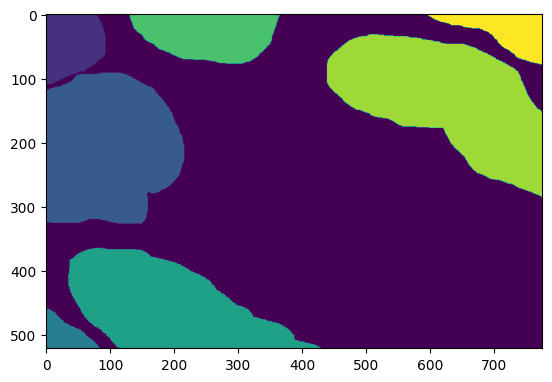

In [11]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_80_anno.bmp'
image = iio.imread(path)
print(image)
plt.imshow(image)
plt.show()

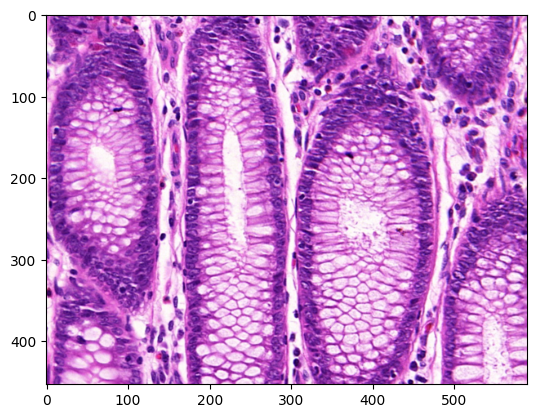

In [12]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_84.bmp'
image = iio.imread(path)
plt.imshow(image)
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 8 8 8]
 [0 0 0 ... 8 8 8]]


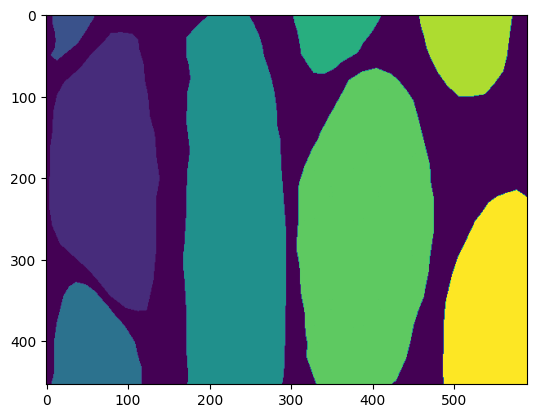

In [13]:
path = '/kaggle/input/glasmiccai2015-gland-segmentation/Warwick_QU_Dataset/train_84_anno.bmp'
image = iio.imread(path)
print(image)
plt.imshow(image)
plt.show()

In [14]:
image.shape

(453, 589)